In [1]:
pip install matplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn import svm
SVM = svm.SVC()
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from datetime import datetime


In [3]:
# Load the dataset
ww = pd.read_csv('C:/Users/Uche Buzz/Desktop/School stuff/Final Project/Datasets/weatherdata.csv')

In [4]:
ww.tail(10)

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
8833,"Wolverhampton, England",2024-04-07,58.3,48.2,52.7,58.3,41.7,51.2,45.2,75.9,...,8.9,7.0,NaN,2024-04-07T06:27:50,2024-04-07T19:54:19,0.95,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"03414099999,03529099999,03330099999,0353509999..."
8834,"Wolverhampton, England",2024-04-08,57.4,50.2,53.3,57.4,50.2,53.3,47.7,82.0,...,7.9,4.0,NaN,2024-04-08T06:25:32,2024-04-08T19:56:04,0.00,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,"03414099999,03529099999,03330099999,0353509999..."
8835,"Wolverhampton, England",2024-04-09,50.7,42.7,46.5,50.7,35.6,41.5,40.7,80.9,...,4.0,2.0,NaN,2024-04-09T06:23:15,2024-04-09T19:57:49,0.02,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"03414099999,03529099999,03330099999,0353509999..."
8836,"Wolverhampton, England",2024-04-10,55.6,39.1,47.8,55.6,35.4,45.2,44.5,88.5,...,4.8,2.0,NaN,2024-04-10T06:20:58,2024-04-10T19:59:34,0.06,"Rain, Partially cloudy",Partly cloudy throughout the day with rain in ...,rain,"03414099999,03529099999,03330099999,0353509999..."
8837,"Wolverhampton, England",2024-04-11,63.9,52.7,57.8,63.9,52.7,57.8,52.6,83.4,...,15.1,8.0,NaN,2024-04-11T06:18:41,2024-04-11T20:01:20,0.09,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"03414099999,03529099999,03520099999,0333009999..."
8838,"Wolverhampton, England",2024-04-12,63.8,49.0,56.0,63.8,44.6,55.5,47.2,73.4,...,10.7,4.0,NaN,2024-04-12T06:16:25,2024-04-12T20:03:05,0.12,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"03414099999,03529099999,03330099999,0353509999..."
8839,"Wolverhampton, England",2024-04-13,59.0,47.5,53.0,59.0,44.3,52.3,46.9,80.0,...,10.8,6.0,NaN,2024-04-13T06:14:10,2024-04-13T20:04:50,0.15,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"03414099999,03529099999,03520099999,0333009999..."
8840,"Wolverhampton, England",2024-04-14,54.2,40.4,48.0,54.2,37.2,45.8,37.8,68.7,...,14.1,8.0,NaN,2024-04-14T06:11:56,2024-04-14T20:06:35,0.19,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"03414099999,03529099999,03520099999,0333009999..."
8841,"Wolverhampton, England",2024-04-15,48.8,44.3,46.2,42.1,37.1,39.4,38.3,74.4,...,14.1,7.0,NaN,2024-04-15T06:09:42,2024-04-15T20:08:21,0.25,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"03414099999,03529099999,03520099999,0333009999..."
8842,"Wolverhampton, England",2024-04-16,53.0,40.8,47.1,53.0,37.0,43.2,39.5,75.1,...,12.0,10.0,NaN,2024-04-16T06:07:29,2024-04-16T20:10:06,0.25,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"03414099999,03529099999,03520099999,0333009999..."


# Pre-Processing

In [5]:
ww['target'] = ww.shift(-1)['temp']
ww = ww.ffill()

In [6]:
#convert to celcius
def F_to_c(f):
    return   (f - 32)* 0.55 

In [7]:
ww['tempmax'] = ww['tempmax'].apply(F_to_c)
ww['tempmin'] = ww['tempmin'].apply(F_to_c)
ww['feelslike'] = ww['feelslike'].apply(F_to_c)
ww['feelslikemin'] = ww['feelslikemin'].apply(F_to_c)
ww['feelslikemax'] = ww['feelslikemax'].apply(F_to_c)
ww['target'] = ww['target'].apply(F_to_c)

In [8]:
ww.apply(pd.isnull).sum()

name                   0
datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype             0
snow                 366
snowdepth            366
windgust            1827
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility             0
solarradiation      3623
solarenergy         3623
uvindex             3623
severerisk          8843
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               0
target                 0
dtype: int64

In [9]:
ww.dropna(axis=1, inplace=True)

In [10]:
ww.apply(pd.isnull).sum()

name                0
datetime            0
tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
precipcover         0
preciptype          0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
sunrise             0
sunset              0
moonphase           0
conditions          0
description         0
icon                0
stations            0
target              0
dtype: int64

In [11]:
#cw = ww[['tempmax','tempmin','temp','precip','datetime']].copy()
cw = ww[['tempmax','tempmin','temp','dew', 'feelslike','feelslikemin','feelslikemax','precip', 'windspeed', "datetime", "target"]].copy()
#cw = ww[['tempmax','tempmin','temp','precip','datetime','target']].copy()
#cw = ww[['tempmax','tempmin','temp','precip',]].copy()

In [12]:
#cw.corr().plot()

In [13]:
cw.head()

,tempmax,tempmin,temp,dew,feelslike,feelslikemin,feelslikemax,precip,windspeed,datetime,target
0,8.030,0.880,40.7,39.4,4.290,0.880,6.875,0.052,5.6,2000-01-01,6.765
1,10.340,4.015,44.3,41.2,4.840,1.650,10.340,0.000,15.2,2000-01-02,7.645
2,10.395,3.575,45.9,42.5,5.720,1.210,10.395,0.071,18.2,2000-01-03,2.970
3,5.720,1.155,37.4,34.3,-0.220,-2.475,2.145,0.037,15.8,2000-01-04,6.325
4,11.055,1.705,43.5,39.1,3.245,-1.925,11.055,0.011,22.9,2000-01-05,6.985


In [14]:
cw['datetime'] = pd.to_datetime(cw['datetime'])
cw.set_index('datetime', inplace=True)

In [15]:
cw

,tempmax,tempmin,temp,dew,feelslike,feelslikemin,feelslikemax,precip,windspeed,target
datetime,,,,,,,,,,
2000-01-01,8.030,0.880,40.7,39.4,4.290,0.880,6.875,0.052,5.6,6.765
2000-01-02,10.340,4.015,44.3,41.2,4.840,1.650,10.340,0.000,15.2,7.645
2000-01-03,10.395,3.575,45.9,42.5,5.720,1.210,10.395,0.071,18.2,2.970
2000-01-04,5.720,1.155,37.4,34.3,-0.220,-2.475,2.145,0.037,15.8,6.325
2000-01-05,11.055,1.705,43.5,39.1,3.245,-1.925,11.055,0.011,22.9,6.985
...,...,...,...,...,...,...,...,...,...,...
2024-04-12,17.490,9.350,56.0,47.2,12.925,6.930,17.490,0.000,14.3,11.550
2024-04-13,14.850,8.525,53.0,46.9,11.165,6.765,14.850,0.004,14.8,8.800
2024-04-14,12.210,4.620,48.0,37.8,7.590,2.860,12.210,0.000,12.2,7.810


In [16]:
cw['month'] = cw.index.month
cw['day'] = cw.index.day
cw['year'] = cw.index.year

In [17]:
cw.head()

,tempmax,tempmin,temp,dew,feelslike,feelslikemin,feelslikemax,precip,windspeed,target,month,day,year
datetime,,,,,,,,,,,,,
2000-01-01,8.030,0.880,40.7,39.4,4.290,0.880,6.875,0.052,5.6,6.765,1,1,2000
2000-01-02,10.340,4.015,44.3,41.2,4.840,1.650,10.340,0.000,15.2,7.645,1,2,2000
2000-01-03,10.395,3.575,45.9,42.5,5.720,1.210,10.395,0.071,18.2,2.970,1,3,2000
2000-01-04,5.720,1.155,37.4,34.3,-0.220,-2.475,2.145,0.037,15.8,6.325,1,4,2000
2000-01-05,11.055,1.705,43.5,39.1,3.245,-1.925,11.055,0.011,22.9,6.985,1,5,2000


In [18]:
cw.index.year.value_counts().sort_index()

datetime
2000    366
2001    365
2002    365
2003    365
2004    366
2005    335
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023    365
2024    107
Name: count, dtype: int64

In [19]:
cw.dtypes

tempmax         float64
tempmin         float64
temp            float64
dew             float64
feelslike       float64
feelslikemin    float64
feelslikemax    float64
precip          float64
windspeed       float64
target          float64
month             int32
day               int32
year              int32
dtype: object

## Further Preprocessing

In [20]:
cw['temp__max'] = cw['temp'].rolling(5).mean()

In [21]:
cw = cw.iloc[30:,:].copy()

In [22]:
def pct_diff(old, new):
    return (new - old) / old

def compute_rolling(cw, horizon, col):
    label = f"rolling_{horizon}_{col}"
    cw[label] = cw[col].rolling(horizon).mean()
    cw[f"{label}_pct"] = pct_diff(cw[label],cw[col])
    return cw
    
rolling_horizons = [3, 14]
for horizon in rolling_horizons:
    for col in ["tempmax", "tempmin"]:
        cw = compute_rolling(cw, horizon, col)

<Axes: >

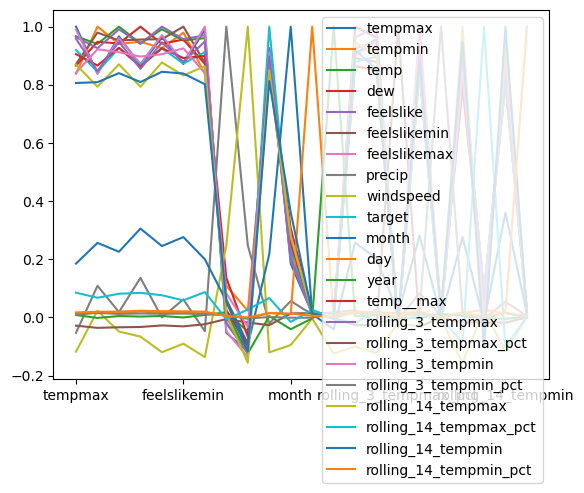

In [23]:
cw.corr().plot()

In [24]:
X = cw.drop(['target','temp'], axis=1)  # Features
y = cw['target']  # Target variable

In [25]:
X

,tempmax,tempmin,dew,feelslike,feelslikemin,feelslikemax,precip,windspeed,month,day,year,temp__max,rolling_3_tempmax,rolling_3_tempmax_pct,rolling_3_tempmin,rolling_3_tempmin_pct,rolling_14_tempmax,rolling_14_tempmax_pct,rolling_14_tempmin,rolling_14_tempmin_pct
datetime,,,,,,,,,,,,,,,,,,,,
2000-01-31,11.605,9.075,45.3,9.845,6.325,11.605,0.041,24.4,1,31,2000,46.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-01,10.285,7.590,43.7,6.765,4.400,10.285,0.036,17.6,2,1,2000,48.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-02,8.745,3.135,36.9,3.740,0.605,6.050,0.070,14.9,2,2,2000,49.20,10.211667,-0.143627,6.600000,-0.525000,NaN,NaN,NaN,NaN
2000-02-03,8.085,4.840,39.0,4.125,1.925,5.665,0.019,11.1,2,3,2000,47.78,9.038333,-0.105477,5.188333,-0.067138,NaN,NaN,NaN,NaN
2000-02-04,10.945,8.140,46.0,7.315,5.115,10.945,0.019,17.8,2,4,2000,47.34,9.258333,0.182178,5.371667,0.515358,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-12,17.490,9.350,47.2,12.925,6.930,17.490,0.000,14.3,4,12,2024,52.28,16.005000,0.092784,8.213333,0.138393,13.985714,0.250562,7.342500,0.273408
2024-04-13,14.850,8.525,46.9,11.165,6.765,14.850,0.004,14.8,4,13,2024,52.22,16.628333,-0.106946,9.753333,-0.125940,14.060357,0.056161,7.719643,0.104326
2024-04-14,12.210,4.620,37.8,7.590,2.860,12.210,0.000,12.2,4,14,2024,52.52,14.850000,-0.177778,7.498333,-0.383863,14.170357,-0.138342,7.892500,-0.414634


In [26]:
X.isnull().sum()

tempmax                    0
tempmin                    0
dew                        0
feelslike                  0
feelslikemin               0
feelslikemax               0
precip                     0
windspeed                  0
month                      0
day                        0
year                       0
temp__max                  0
rolling_3_tempmax          2
rolling_3_tempmax_pct      2
rolling_3_tempmin          2
rolling_3_tempmin_pct      2
rolling_14_tempmax        13
rolling_14_tempmax_pct    13
rolling_14_tempmin        13
rolling_14_tempmin_pct    13
dtype: int64

In [27]:
X.dropna(axis = 1, inplace =True)

In [28]:
X.isnull().sum()

tempmax         0
tempmin         0
dew             0
feelslike       0
feelslikemin    0
feelslikemax    0
precip          0
windspeed       0
month           0
day             0
year            0
temp__max       0
dtype: int64

In [29]:
# Optionally, scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
# X_train = cw.loc['2010-01-01':'2010-12-31']
# y_train = cw.loc['2022-01-01':'2022-12-31', 'target']

# X_test = cw.loc['2010-01-01':'2010-12-31']
# y_test = cw.loc['2022-01-01':'2022-12-31', 'target']


# train = cw[cw['year'] < 2024]
# test = cw[cw['year'] == 2024]

# X_train = cw.loc[:'2010-12-31']
# y_train = cw.loc[:'2024-04-15', 'target']

# X_test = cw.loc[:'2010-12-31']
# y_test = cw.loc[:'2024-04-15', 'target']

# Adjust the date ranges for training and testing datasets
X_train = cw.loc['2001-01-01':'2020-01-01']
y_train = cw.loc['2001-01-01':'2020-01-01', 'target']

X_test = cw.loc['2022-01-01':'2022-12-31']
y_test = cw.loc['2022-01-01':'2022-12-31', 'target']

In [31]:
X_train.dropna(inplace=True, axis =1)

C:\Users\Uche Buzz\AppData\Local\Temp\ipykernel_11716\3438999675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.dropna(inplace=True, axis =1)


In [32]:
X_train.isnull().sum()

tempmax                   0
tempmin                   0
temp                      0
dew                       0
feelslike                 0
feelslikemin              0
feelslikemax              0
precip                    0
windspeed                 0
target                    0
month                     0
day                       0
year                      0
temp__max                 0
rolling_3_tempmax         0
rolling_3_tempmax_pct     0
rolling_3_tempmin         0
rolling_3_tempmin_pct     0
rolling_14_tempmax        0
rolling_14_tempmax_pct    0
rolling_14_tempmin        0
rolling_14_tempmin_pct    0
dtype: int64

In [33]:
y_train.isnull().sum()

0

In [34]:
print(X_train.shape)
print(y_train.shape)


(6910, 22)
(6910,)


In [35]:
# # Align y_train with the date range of X_train
# y_train = cw.loc[:'2020-12-31', 'target']

# # Now check the shapes to ensure they match
# print(f"Shape of X_train: {X_train.shape}")
# print(f"Shape of y_train: {y_train.shape}")


In [36]:
# # Align y_test with the date range of X_test
# y_test = cw.loc[:'2020-12-31', 'target']

# # Now check the shapes to ensure they match
# print(f"Shape of X_test: {X_test.shape}")
# print(f"Shape of y_test: {y_test.shape}")


In [37]:
# # Find the common features
# common_features = list(set(X_train.columns) & set(X_test.columns))

# # Select these common features in both datasets
# X_train = X_train[common_features]
# X_test = X_test[common_features]

# # Verify the shapes again
# print(f"Shape of X_train after aligning features: {X_train.shape}")
# print(f"Shape of X_test after aligning features: {X_test.shape}")


# Model Fitting

### Linear Regression

In [38]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print(f'Linear Regression - MSE: {mse_linear}, R^2: {r2_linear}')
#print(f'Accuracy: {round(conf_accuracy,2)}') 


Linear Regression - MSE: 5.547730290253584e-26, R^2: 1.0


In [39]:
#plot
y_pred_linear =  pd.Series(y_pred_linear, index = y_test.index)
# Combine and plot
combined_linear = pd.concat([pd.Series(y_test), pd.Series(y_pred_linear)], axis=1)
combined_linear.columns = ['actual', 'predictions']
print(combined_linear)


            actual  predictions
datetime                       
2022-01-01   9.515        9.515
2022-01-02   7.865        7.865
2022-01-03   3.245        3.245
2022-01-04   1.925        1.925
2022-01-05   1.705        1.705
...            ...          ...
2022-12-27   8.800        8.800
2022-12-28   6.490        6.490
2022-12-29   8.415        8.415
2022-12-30   9.900        9.900
2022-12-31   8.470        8.470

[365 rows x 2 columns]


In [40]:
# import matplotlib.pyplot as plt
# import pandas as pd

# # Sample test
# data = {
#     'Date': ['2024-06-01', '2024-06-02', '2024-06-03'],
#     'Actual': [10, 20, 30],
#     'LR': [12, 19, 29]
# }

# df = pd.DataFrame(data)
# df.set_index('Date', inplace=True)

# # Plotting the data
# df.plot()

# # Adding title and showing the plot
# plt.title('Linear Regression Predictions vs Actual')
# plt.xlabel('Date')
# plt.ylabel('Values')
# plt.legend(['Actual', 'LR'])
# plt.show()


AttributeError: module 'matplotlib' has no attribute 'title'

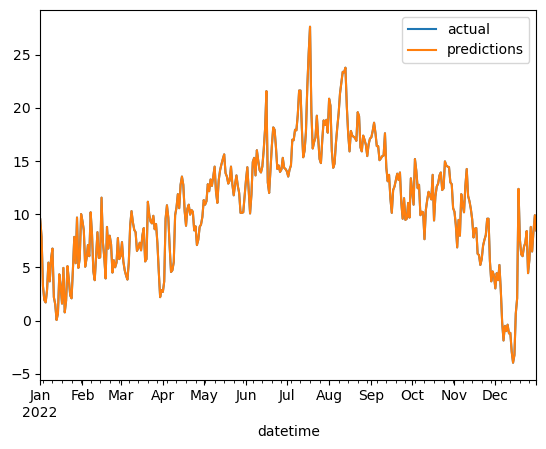

In [41]:
combined_linear.plot()
plt.title('Linear Regression Predictions vs Actual')
plt.ylabel('Temperature')
plt.show()

### Random Forest

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Random Forest
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest - MSE: {mse_rf}, R^2: {r2_rf}')


Random Forest - MSE: 0.0386465314520552, R^2: 0.9986865652505492


In [ ]:
#plot
y_pred_rf =  pd.Series(y_pred_rf, index = y_test.index)
# Combine and plot
combined_rf = pd.concat([pd.Series(y_test), pd.Series(y_pred_rf)], axis=1)
combined_rf.columns = ['actual', 'predictions']
print(combined_rf)
combined_rf.plot()
plt.title('Random Forest Predictions vs Actual')
plt.ylabel('Temperature')
plt.show()

### Support Vector Machine

In [44]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
# Support Vector Machine
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f'SVM - MSE: {mse_svr}, R^2: {r2_svr}')


SVM - MSE: 29.985021849750137, R^2: -0.019066089006259057


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_dist = {
    'C': [0.1, 1, 10, 100, 1000],
     'epsilon': [0.001, 0.01, 0.1, 1],
      'kernel': ['poly'],#linear],
     'degree': [2, 3, 4]}  # Only used for 'poly' kernel
#     'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'}

# Initialize the SVR model
svm_model = SVR()

# RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(estimator=svm_model, param_distributions=param_dist,
                                   n_iter=50, scoring='neg_mean_squared_error', cv=5, random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_

# Train the model with the best parameters
best_svm_model = random_search.best_estimator_

# Predict on the test set
y_pred_svm = best_svm_model.predict(X_test)

# Calculate Mean Squared Error and R^2
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

# Output the results
print(f'Best Parameters: {best_params}')
print(f'SVM - MSE: {mse_svm}, R^2: {r2_svm}')


In [ ]:
# from sklearn.svm import SVR
# from sklearn.metrics import mean_squared_error, r2_score

# # Initial hyperparameter tuning
# best_mse = float('inf')
# best_params = {}
# kernels = ['linear', 'rbf']  # Simplified set of kernels
# C_values = [1, 10, 100]  # Example range for C
# epsilon_values = [0.01, 0.1, 1]  # Example range for epsilon

# for kernel in kernels:
#     for C in C_values:
#         for epsilon in epsilon_values:
#             svm_model = SVR(kernel=kernel, C=C, epsilon=epsilon)
#             svm_model.fit(X_train, y_train)
#             y_pred_svm = svm_model.predict(X_test)
#             mse_svm = mean_squared_error(y_test, y_pred_svm)
#             if mse_svm < best_mse:
#                 best_mse = mse_svm
#                 best_params = {'kernel': kernel, 'C': C, 'epsilon': epsilon}

# # Train the best model with the chosen parameters
# best_svm_model = SVR(kernel=best_params['kernel'], C=best_params['C'], epsilon=best_params['epsilon'])
# best_svm_model.fit(X_train, y_train)
# y_pred_svm = best_svm_model.predict(X_test)

# # Calculate Mean Squared Error and R^2
# mse_svm = mean_squared_error(y_test, y_pred_svm)
# r2_svm = r2_score(y_test, y_pred_svm)

# # Output the results
# print(f'Best Parameters: {best_params}')
# print(f'SVM - MSE: {mse_svm}, R^2: {r2_svm}')


In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.svm import SVR
# from scipy.stats import uniform, randint

# # Define the parameter distributions
# param_dist = {
#     'C': uniform(0.1, 1000),  # Continuous distribution from 0.1 to 1000
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#     'degree': randint(2, 6),  # Discrete uniform distribution from 2 to 5
#     'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
#     'epsilon': uniform(0.1, 0.4),  # Continuous distribution from 0.1 to 0.5
#     'shrinking': [True, False],
#     'tol': uniform(1e-5, 1e-3),  # Continuous distribution from 1e-5 to 1e-3
#     'cache_size': [200, 400, 600]
# }

# # Initialize the SVR model
# svr = SVR()

# # Initialize the Randomized Search
# random_search = RandomizedSearchCV(
#     estimator=svr,
#     param_distributions=param_dist,
#     n_iter=100,  # Number of parameter settings that are sampled
#     cv=5,  # 5-fold cross-validation
#     n_jobs=-1,  # Use all available cores
#     verbose=2,
#     random_state=42  # For reproducibility
# )

# # Fit the model
# random_search.fit(X_train, y_train)

# # Get the best parameters
# best_params = random_search.best_params_
# print("Best Parameters:", best_params)


In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVR

# # Define the parameter grid
# param_grid = {
#     'C': [0.1, 1, 10, 100, 1000],
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#     'degree': [2, 3, 4, 5],
#     'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
#     'epsilon': [0.1, 0.2, 0.5, 0.3, 0.4],
#     'shrinking': [True, False],
#     'tol': [1e-3, 1e-4, 1e-5],
#     'cache_size': [200, 400, 600]
# }

# # Initialize the SVR model
# svr = SVR()

# # Initialize the Grid Search
# grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# # Fit the model
# grid_search.fit(X_train, y_train)

# # Get the best parameters
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)


In [ ]:
y_pred_svm =  pd.Series(y_pred_svm, index = y_test.index)
combined_svm = pd.concat([pd.Series(y_test), pd.Series(y_pred_svm)], axis=1)
combined_svm.columns = ['actual', 'predictions']
print(combined_svm)
combined_svm.plot()
plt.title('SVM Predictions vs Actual')
plt.show()

### Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Ridge Regression
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f'Ridge Regression - MSE: {mse_ridge}, R^2: {r2_ridge}')


In [ ]:
#plot
y_pred_ridge =  pd.Series(y_pred_ridge, index = y_test.index)

#plot
combined_ridge = pd.concat([pd.Series(y_test), pd.Series(y_pred_ridge)], axis=1)
combined_ridge.columns = ['actual', 'predictions']
print(combined_ridge)
combined_ridge.plot()
plt.title('Ridge Regression Predictions vs Actual')
plt.ylabel('Temperature')
plt.show()

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# # Hyperparameter distribution
param_dist = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': np.arange(2, 21, 2),
    'min_samples_leaf': np.arange(1, 21, 2),
    'max_features': [None, 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 50]
}

# Initialize the model
tree_model = DecisionTreeRegressor(random_state=42)

# RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(estimator=tree_model, param_distributions=param_dist, 
                                   n_iter=50, scoring='neg_mean_squared_error', cv=5, random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_

# Train the model with the best parameters
best_tree_model = random_search.best_estimator_

# Predict on the test set
y_pred_tree = best_tree_model.predict(X_test)

# Calculate Mean Squared Error and R^2
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

# Output the results
print(f'Best Parameters: {best_params}')
print(f'Decision Tree - MSE: {mse_tree}, R^2: {r2_tree}')


In [ ]:
# #Decision Tree
# tree_model = DecisionTreeRegressor(random_state=42)
# tree_model.fit(X_train, y_train)
# y_pred_tree = tree_model.predict(X_test)
# mse_tree = mean_squared_error(y_test, y_pred_tree)
# r2_tree = r2_score(y_test, y_pred_tree)
# print(f'Decision Tree - MSE: {mse_tree}, R^2: {r2_tree}')

In [ ]:
y_test

In [ ]:
y_pred_tree

In [ ]:
y_pred_tree = pd.Series(y_pred_tree, index = y_test.index)

In [ ]:
combined = pd.concat([y_test, y_pred_tree], axis = 1)

combined.columns = ['actual','Decision Tree predictions']
combined

In [ ]:
combined.plot()
plt.title('Decision Tree Predictions vs Actual')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error



# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train Decision Tree model with parameters to avoid overfitting
tree_model = DecisionTreeRegressor(max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42)
tree_model.fit(X_train_scaled, y_train)

# Predict on train and test data
y_train_pred = tree_model.predict(X_train_scaled)
y_test_pred = tree_model.predict(X_test_scaled)

# Calculate evaluation metrics for Decision Tree
mse_tree_train = mean_squared_error(y_train, y_train_pred)
rmse_tree_train = np.sqrt(mse_tree_train)
mae_tree_train = mean_absolute_error(y_train, y_train_pred)
r2_tree_train = r2_score(y_train, y_train_pred)

mse_tree_test = mean_squared_error(y_test, y_test_pred)
rmse_tree_test = np.sqrt(mse_tree_test)
mae_tree_test = mean_absolute_error(y_test, y_test_pred)
r2_tree_test = r2_score(y_test, y_test_pred)

print(f'Decision Tree (Train) - MSE: {mse_tree_train:.4f}, RMSE: {rmse_tree_train:.4f}, MAE: {mae_tree_train:.4f}, R^2: {r2_tree_train:.4f}')
print(f'Decision Tree (Test) - MSE: {mse_tree_test:.4f}, RMSE: {rmse_tree_test:.4f}, MAE: {mae_tree_test:.4f}, R^2: {r2_tree_test:.4f}')

# Visualization

# Predictions vs Actual for Train and Test
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.3)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data: Actual vs Predicted')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Testing Data: Actual vs Predicted')

plt.tight_layout()
plt.show()

# Residuals Plot
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train_pred, y_train - y_train_pred, alpha=0.3)
plt.hlines(y=0, xmin=y_train_pred.min(), xmax=y_train_pred.max(), colors='r', linestyles='dashed')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Training Data: Residuals')

plt.subplot(1, 2, 2)
plt.scatter(y_test_pred, y_test - y_test_pred, alpha=0.3)
plt.hlines(y=0, xmin=y_test_pred.min(), xmax=y_test_pred.max(), colors='r', linestyles='dashed')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Testing Data: Residuals')

plt.tight_layout()
plt.show()


In [ ]:
# Random Forest
forest_model = RandomForestRegressor(random_state=42, n_estimators=100)
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)
print(f'Random Forest - MSE: {mse_forest}, R^2: {r2_forest}')

In [ ]:

# Support Vector Regression (SVR)
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f'SVR - MSE: {mse_svr}, R^2: {r2_svr}')

In [ ]:
pip install statsmodels


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
arima_model = ARIMA(y_train, order=(5, 0, 0))  # Adjust order=(p,d,q) as needed
arima_model_fit = arima_model.fit()


In [ ]:
y_pred_arima = arima_model_fit.forecast(steps=len(y_test))


In [ ]:
y_pred_arima

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

In [ ]:
# Define ARIMA hyperparameters
p = 1  # example value, replace with your actual p
d = 1  # example value, replace with your actual d
q = 1  # example value, replace with your actual q

# Calculate evaluation metrics for ARIMA
mse_arima = mean_squared_error(y_test, y_pred_arima)
rmse_arima = np.sqrt(mse_arima)
mae_arima = mean_absolute_error(y_test, y_pred_arima)
r2_arima = r2_score(y_test, y_pred_arima)

# Print evaluation metrics including hyperparameters
print(f'ARIMA(p={p}, d={d}, q={q}) - MSE: {mse_arima:.4f}, RMSE: {rmse_arima:.4f}, MAE: {mae_arima:.4f}, R^2: {r2_arima:.4f}')


In [ ]:
# Calculate evaluation metrics for ARIMA
mse_arima = mean_squared_error(y_test, y_pred_arima)
rmse_arima = np.sqrt(mse_arima)
mae_arima = mean_absolute_error(y_test, y_pred_arima)
r2_arima = r2_score(y_test, y_pred_arima)

print(f'ARIMA - MSE: {mse_arima:.4f}, RMSE: {rmse_arima:.4f}, MAE: {mae_arima:.4f}, R^2: {r2_arima:.4f}')


In [ ]:
#plot
y_pred_arima =  pd.Series(y_pred_arima, index = y_test.index)

#plot
combined_arima = pd.concat([pd.Series(y_test), pd.Series(y_pred_arima)], axis=1)
combined_arima.columns = ['actual', 'predictions']
print(combined_ridge)
combined_ridge.plot()
plt.title('Arima Regression Predictions vs Actual')
plt.show()

In [ ]:
#Prophet - for Appendix

In [ ]:
pip install prophet


In [ ]:
from prophet import Prophet
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
# Prepare the data for Prophet
# Assuming `data` is your original dataframe with a datetime index and 'target_variable' column
#cw = cw.reset_index()
cww = cw.rename(columns={'datetime': 'ds', 'temp': 'y'})

# Split the data into training and testing sets
train_data = cw.iloc[:int(len(cw)*0.8)]
test_data = cw.iloc[int(len(cw)*0.8):]


In [ ]:
cww

In [ ]:
# Fit the Prophet model
prophet_model = Prophet()
prophet_model.fit(train_data)

# Make future predictions
future = prophet_model.make_future_dataframe(periods=len(test_data))
forecast = prophet_model.predict(future)


In [ ]:
# Extract the predicted values
y_pred_prophet = forecast['yhat'].iloc[-len(test_data):].values


In [ ]:
# Evaluation
mse_prophet = mean_squared_error(test_data['y'], y_pred_prophet)
r2_prophet = r2_score(test_data['y'], y_pred_prophet)
print(f'Prophet - MSE: {mse_prophet}, R^2: {r2_prophet}')

# Combine and plot
combined_prophet = pd.concat([test_data['y'].reset_index(drop=True), pd.Series(y_pred_prophet)], axis=1)
combined_prophet.columns = ['actual', 'predictions']
print(combined_prophet)
combined_prophet.plot()
plt.title('Prophet Predictions vs Actual')
plt.show()

# SArima

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model
sarima_model = SARIMAX(y_train['temp'], order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_fitted = sarima_model.fit()

# Make predictions
y_pred_sarima = sarima_fitted.predict(start=len(y_train), end=len(y_train)+len(y_test)-1)

# Evaluation
mse_sarima = mean_squared_error(test['temp'], y_pred_sarima)
r2_sarima = r2_score(test['temp'], y_pred_sarima)
print(f'SARIMA - MSE: {mse_sarima}, R^2: {r2_sarima}')

# Combine and plot
combined_sarima = pd.concat([test['target_variable'].reset_index(drop=True), pd.Series(y_pred_sarima)], axis=1)
combined_sarima.columns = ['actual', 'predictions']
print(combined_sarima)
combined_sarima.plot()
plt.title('SARIMA Predictions vs Actual')
plt.show()
